In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Load the dataset
file_path = '/content/drive/MyDrive/ML_Model/book_rating_system/data/raw/df_cleaned_with_interaction.csv'
df = pd.read_csv(file_path)

In [4]:
df_info = df.copy()
df_info.head()

,title,authors,publisher,published_date,description,page_count,categories,average_rating,ratings_count,language,published_year,book_age,author_publisher_interaction
0,Deep Learning,Ian Goodfellow Yoshua Bengio Aaron Courville,Mit Press,2016-11-18 00:00:00,An Introduction To A Broad Range Of Topics In ...,801.0,Computers,3.5,6.0,En,2016,8,Ian Goodfellow Yoshua Bengio Aaron Courville_M...
1,Deep Learning For Coders With Fastai And Pytorch,Jeremy Howard Sylvain Gugger,OReilly Media,2020-06-29 00:00:00,Deep Learning Is Often Viewed As The Exclusive...,624.0,Computers,4.5,2.0,En,2020,4,Jeremy Howard Sylvain Gugger_OReilly Media
2,The Principles Of Deep Learning Theory,Daniel A Roberts Sho Yaida Boris Hanin,Cambridge University Press,2022-05-26 00:00:00,This Volume Develops An Effective Theory Appro...,473.0,Computers,5.0,2.0,En,2022,2,Daniel A Roberts Sho Yaida Boris Hanin_Cambrid...
3,Advances In Deep Learning,M Arif Wani Farooq Ahmad Bhat Saduf Afzal Asif...,Springer,2019-03-14 00:00:00,This Book Introduces Readers To Both Basic And...,149.0,Technology Engineering,1.0,1.0,En,2019,5,M Arif Wani Farooq Ahmad Bhat Saduf Afzal Asif...
4,Introduction To Deep Learning,Sandro Skansi,Springer,2018-02-04 00:00:00,This Textbook Presents A Concise Accessible An...,191.0,Computers,5.0,1.0,En,2018,6,Sandro Skansi_Springer


In [5]:
# Check for missing values
df_info.isnull().sum()

title                            0
authors                         10
publisher                        0
published_date                   0
description                      4
page_count                       0
categories                       0
average_rating                   0
ratings_count                    0
language                         0
published_year                   0
book_age                         0
author_publisher_interaction     0
dtype: int64

In [6]:
# Fill missing authors based on the most frequent author for each publisher
df_info['authors'] = df_info.groupby('publisher')['authors'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Verify if there are any remaining missing values in the authors column
missing_authors_after_imputation = df_info['authors'].isnull().sum()
missing_authors_after_imputation


0

In [7]:
# Fill missing descriptions based on the most frequent description for each publisher
df_info['description'] = df_info.groupby('publisher')['description'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'No Description Available'))

# Verify if there are any remaining missing values in the description column
missing_description_after_imputation = df_info['description'].isnull().sum()
missing_description_after_imputation


0

In [8]:
df_info.isnull().sum()

title                           0
authors                         0
publisher                       0
published_date                  0
description                     0
page_count                      0
categories                      0
average_rating                  0
ratings_count                   0
language                        0
published_year                  0
book_age                        0
author_publisher_interaction    0
dtype: int64

In [9]:
# Remove the 'author_publisher_interaction' column
df_info.drop(columns=['author_publisher_interaction'], inplace=True)

# Verify the column has been removed
columns_after_removal = df_info.columns
columns_after_removal


Index(['title', 'authors', 'publisher', 'published_date', 'description',
       'page_count', 'categories', 'average_rating', 'ratings_count',
       'language', 'published_year', 'book_age'],
      dtype='object')

In [11]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4866 entries, 0 to 4865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4866 non-null   object 
 1   authors         4866 non-null   object 
 2   publisher       4866 non-null   object 
 3   published_date  4866 non-null   object 
 4   description     4866 non-null   object 
 5   page_count      4866 non-null   float64
 6   categories      4866 non-null   object 
 7   average_rating  4866 non-null   float64
 8   ratings_count   4866 non-null   float64
 9   language        4866 non-null   object 
 10  published_year  4866 non-null   int64  
 11  book_age        4866 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 456.3+ KB


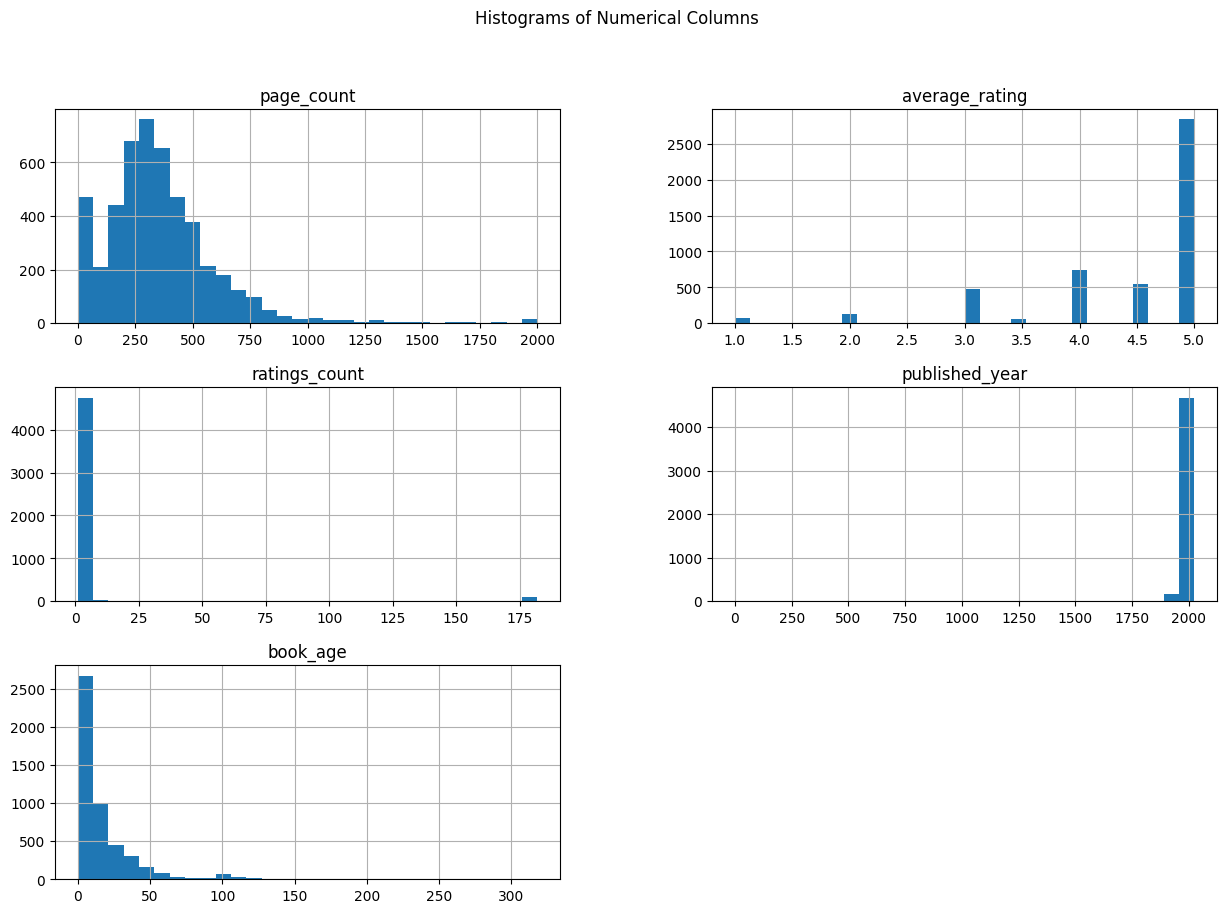

In [13]:

# Plot histograms for numerical columns
df_info.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Columns")
plt.show()


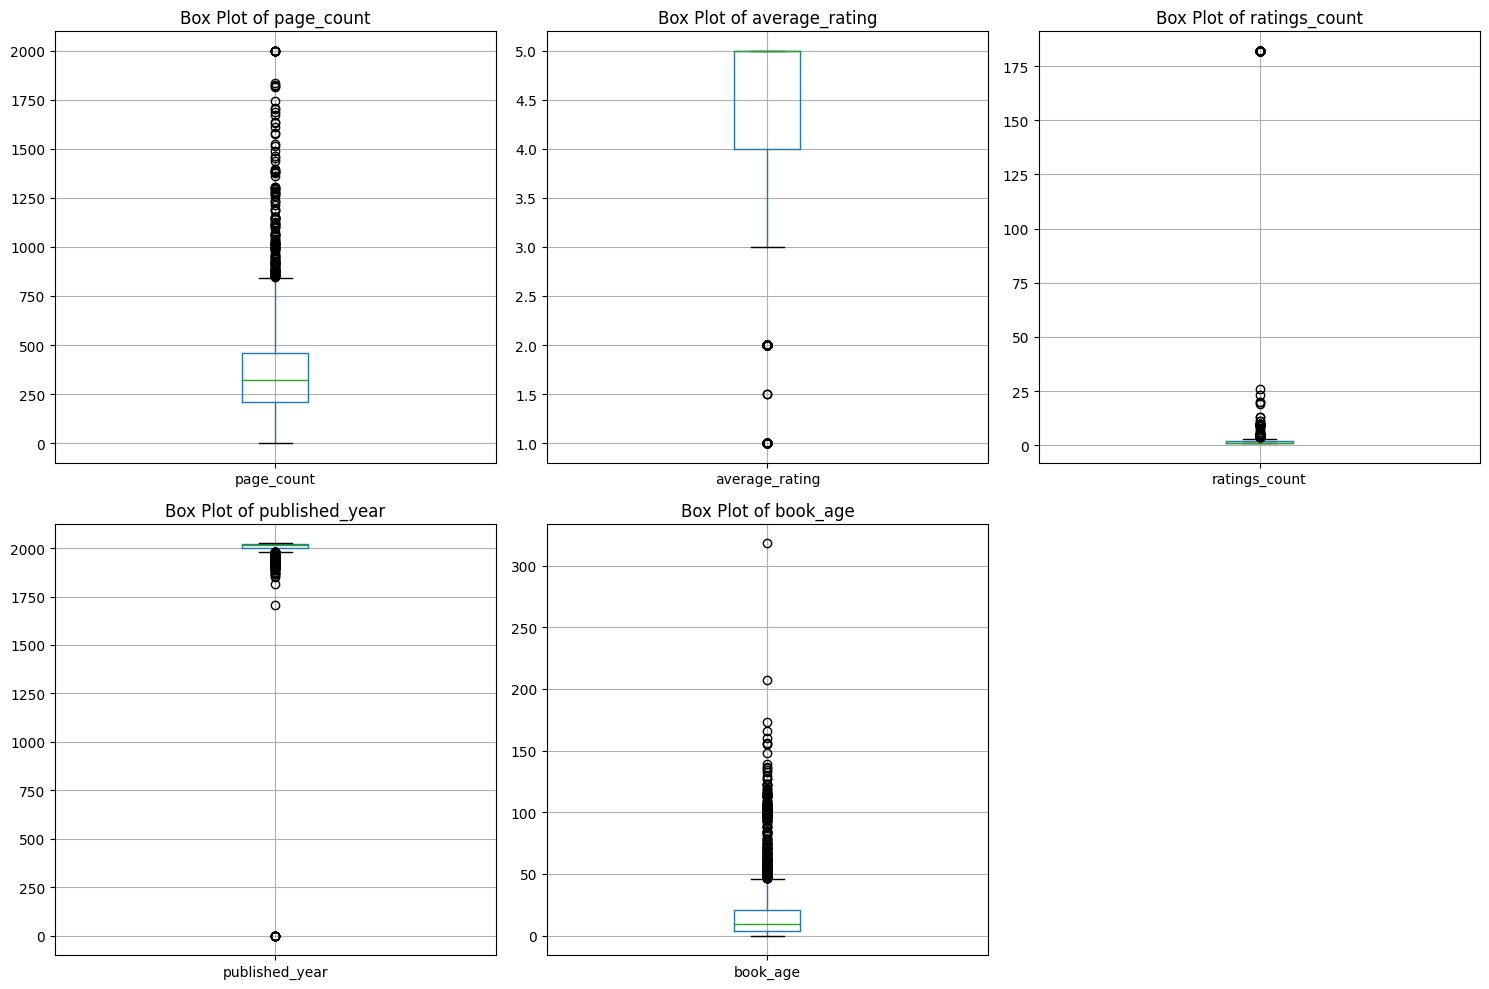

In [14]:
# Plot box plots for numerical columns
numerical_columns = df_info.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    df.boxplot(column=col)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


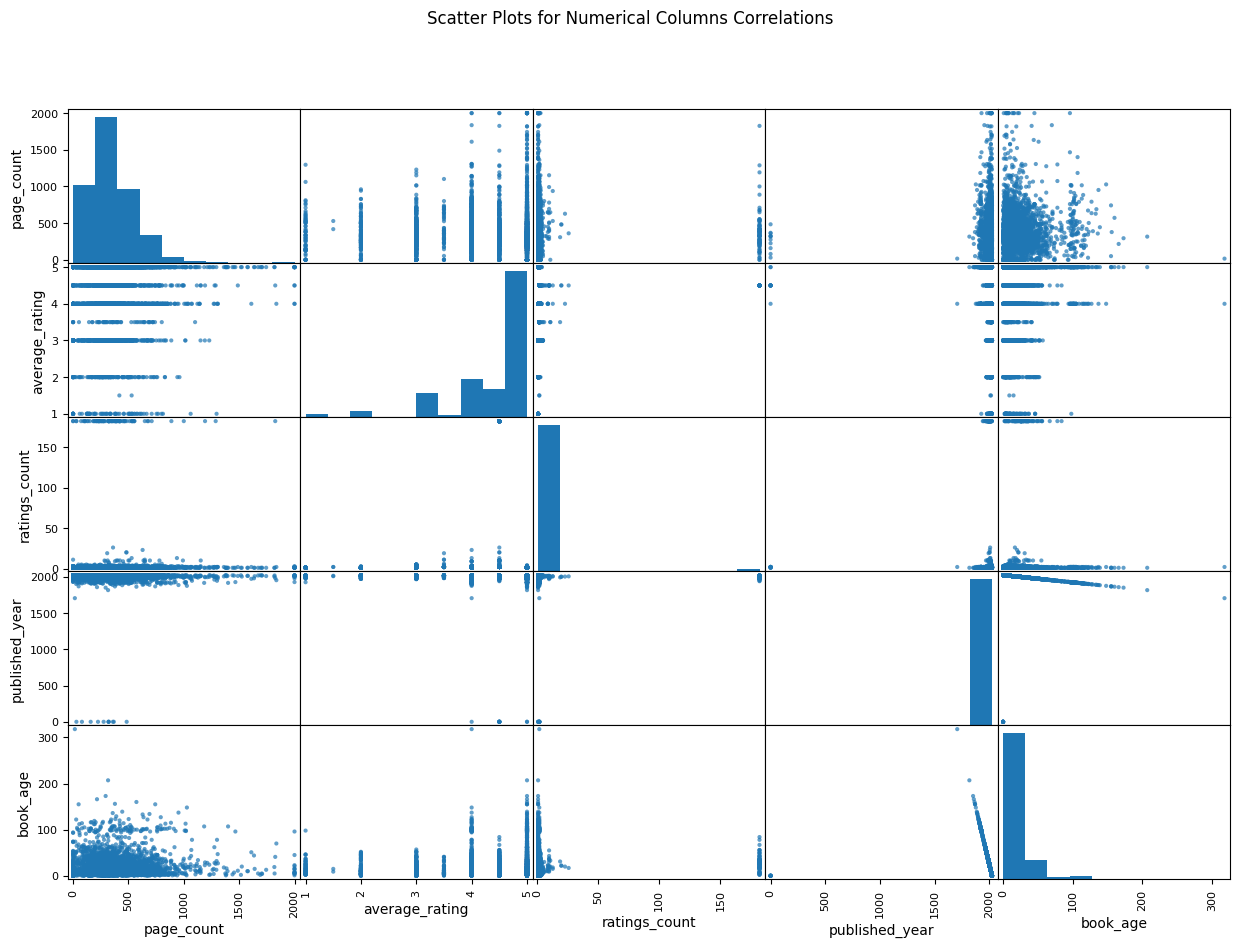

In [25]:
# Plot scatter plots for pairs of numerical columns to visualize correlations
pd.plotting.scatter_matrix(df_info[numerical_columns], figsize=(15, 10), alpha=0.7)
plt.suptitle("Scatter Plots for Numerical Columns Correlations")
plt.show()


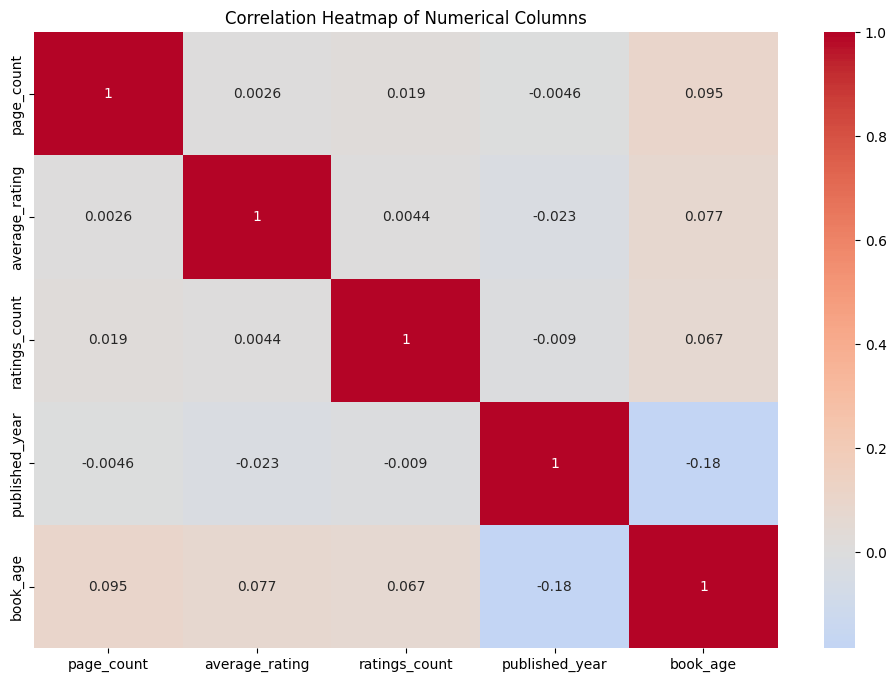

In [27]:

# Calculate the correlation matrix
correlation_matrix = df_info.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()


In [29]:
# Identify outliers using the IQR method
def identify_outliers_iqr(df_info, column):
    Q1 = df_info[column].quantile(0.25)
    Q3 = df_info[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_info[(df_info[column] < lower_bound) | (df_info[column] > upper_bound)]

# Display outliers for each numerical column
outliers = {col: identify_outliers_iqr(df_info, col) for col in numerical_columns}
outliers_count = {col: len(outliers[col]) for col in numerical_columns}
outliers_count


{'page_count': 152,
 'average_rating': 202,
 'ratings_count': 160,
 'published_year': 384,
 'book_age': 352}

In [30]:
# Cap outliers at the 1st and 99th percentiles
def cap_outliers(df_info, column):
    lower_bound = df_info[column].quantile(0.01)
    upper_bound = df_info[column].quantile(0.99)
    df_info[column] = df_info[column].apply(lambda x: max(lower_bound, min(x, upper_bound)))
    return df_info

# Apply capping to all numerical columns with outliers
for col in numerical_columns:
    df_info = cap_outliers(df_info, col)

# Verify the outliers have been capped
outliers_after_capping = {col: identify_outliers_iqr(df_info, col) for col in numerical_columns}
outliers_after_capping_count = {col: len(outliers_after_capping[col]) for col in numerical_columns}
outliers_after_capping_count


{'page_count': 152,
 'average_rating': 202,
 'ratings_count': 160,
 'published_year': 384,
 'book_age': 352}

In [31]:
df_info.to_csv('df_cleaned_with_model.csv', index=False)